<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_9/HOML_Chapter9_Unsupervised_Learning_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# !pip install yellowbrick

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
  silhouette_score, silhouette_samples, 
  f1_score, accuracy_score
)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

# Dataset

In [3]:
olivetti = fetch_olivetti_faces()

In [4]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [5]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [6]:
olivetti["data"].shape

(400, 4096)

In [7]:
np.sqrt(4096)

64.0

## Train-Val-Test Split

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
  olivetti.data, olivetti.target, 
  test_size=0.2, stratify=olivetti.target, 
  random_state=42
)

In [9]:
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((320, 4096), (80, 4096), (320,), (80,))

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
  X_train_val, y_train_val, 
  test_size=0.2, stratify=y_train_val, 
  random_state=42
)

In [11]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((256, 4096), (64, 4096), (256,), (64,))

In [12]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([6, 6, 6, 6, 7, 6, 7, 6, 7, 7, 6, 6, 7, 7, 6, 7, 7, 6, 6, 7, 6, 6,
        6, 6, 6, 7, 7, 7, 6, 6, 6, 7, 6, 6, 7, 6, 6, 7, 6, 7]))

In [13]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
        2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1]))

In [14]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

# KMeans

In [15]:
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [16]:
pca.n_components_

188

In [17]:
wcss = []
silhouette_scores = []
ks = list(range(2, 200, 5))
for k in tqdm(ks, total=len(ks)):
  kmeans = KMeans(n_clusters = k, random_state=42).fit(X_train)
  wcss.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X=X_train, labels=kmeans.labels_))

100%|██████████| 40/40 [07:53<00:00, 11.83s/it]


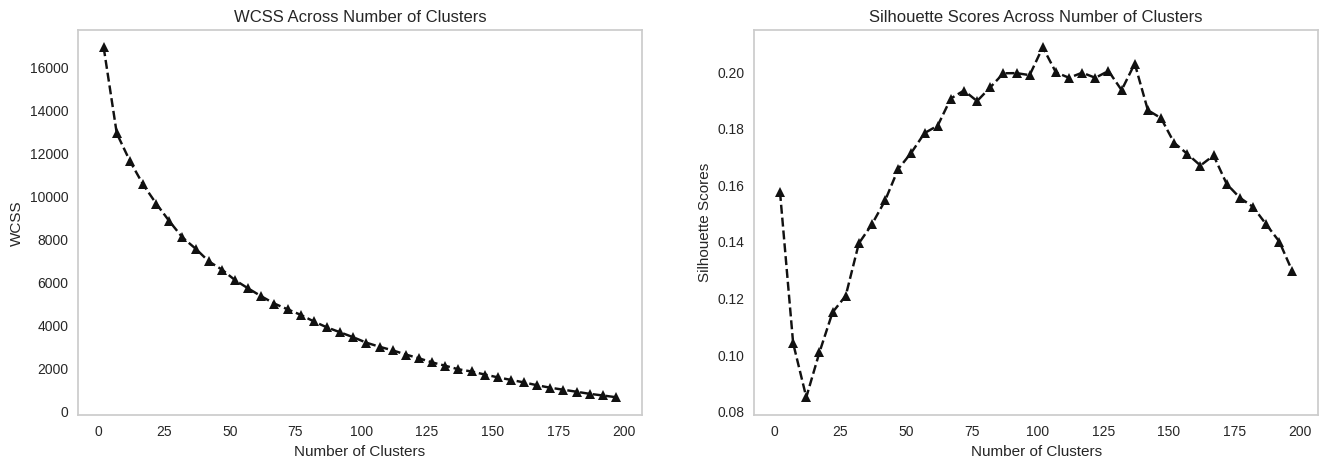

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].plot(ks, wcss, marker="^", linestyle="--", color="k")
ax[0].set(xlabel="Number of Clusters", ylabel="WCSS", title="WCSS Across Number of Clusters")
ax[0].grid()

ax[1].plot(ks, silhouette_scores, marker="^", linestyle="--", color="k")
ax[1].set(xlabel="Number of Clusters", ylabel="Silhouette Scores", title="Silhouette Scores Across Number of Clusters")
ax[1].grid()
plt.show()

In [19]:
ks[np.argmax(silhouette_scores)]

102

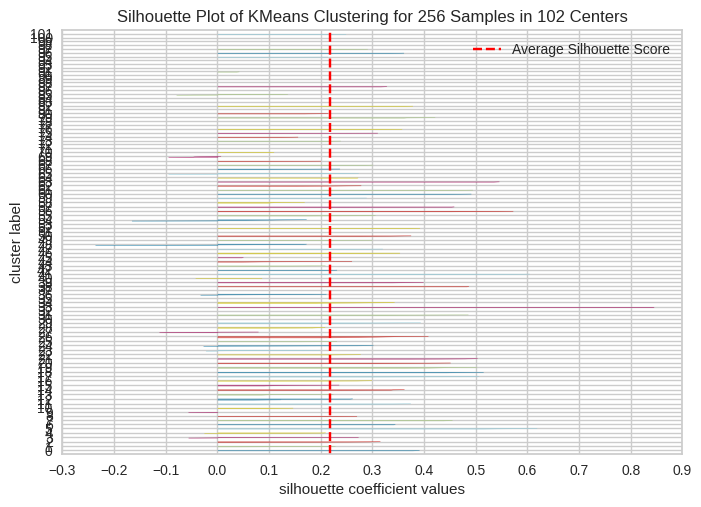

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 256 Samples in 102 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
kmeans = KMeans(n_clusters = ks[np.argmax(silhouette_scores)], random_state=42)
kmeans.fit(X_train_pca)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X_train_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Faces in Cluster 0


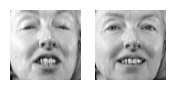

Faces in Cluster 1


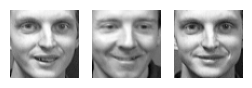

Faces in Cluster 2


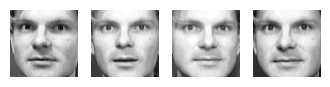

Faces in Cluster 3


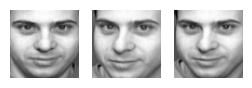

Faces in Cluster 4


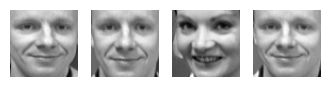

Faces in Cluster 5


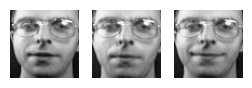

Faces in Cluster 6


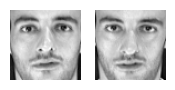

Faces in Cluster 7


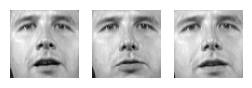

Faces in Cluster 8


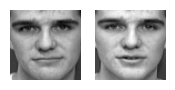

Faces in Cluster 9


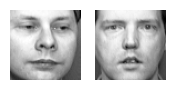

Faces in Cluster 10


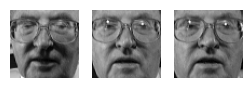

Faces in Cluster 11


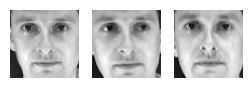

Faces in Cluster 12


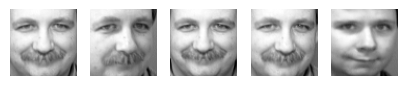

Faces in Cluster 13


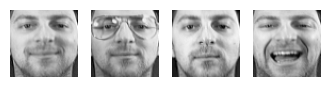

Faces in Cluster 14


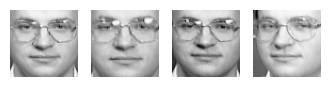

Faces in Cluster 15


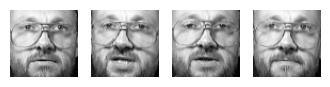

Faces in Cluster 16


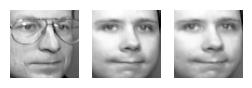

Faces in Cluster 17


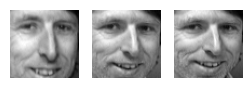

Faces in Cluster 18


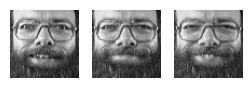

Faces in Cluster 19


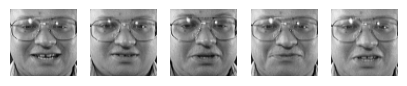

Faces in Cluster 20


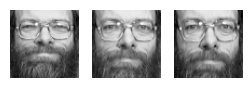

Faces in Cluster 21


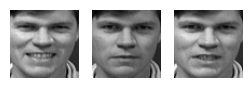

Faces in Cluster 22


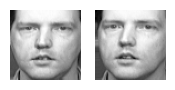

Faces in Cluster 23


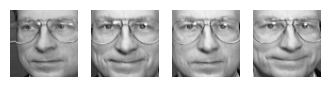

Faces in Cluster 24


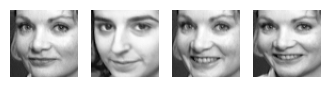

Faces in Cluster 25


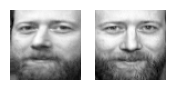

Faces in Cluster 26


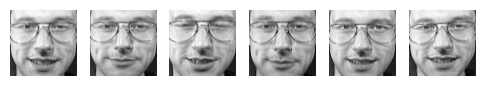

Faces in Cluster 27


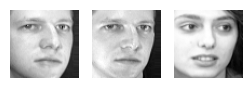

Faces in Cluster 28


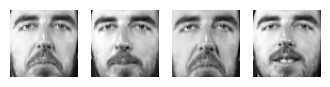

Faces in Cluster 29


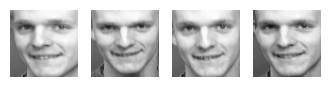

Faces in Cluster 30


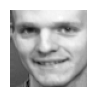

Faces in Cluster 31


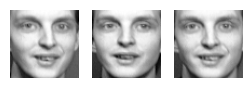

Faces in Cluster 32


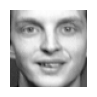

Faces in Cluster 33


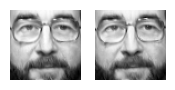

Faces in Cluster 34


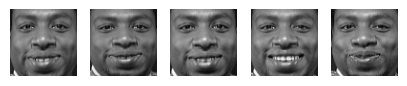

Faces in Cluster 35


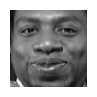

Faces in Cluster 36


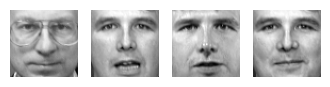

Faces in Cluster 37


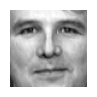

Faces in Cluster 38


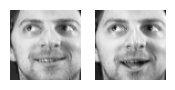

Faces in Cluster 39


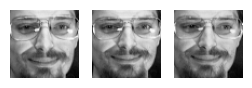

Faces in Cluster 40


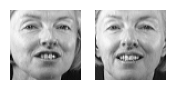

Faces in Cluster 41


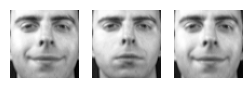

Faces in Cluster 42


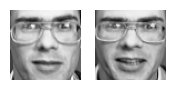

Faces in Cluster 43


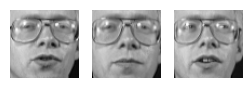

Faces in Cluster 44


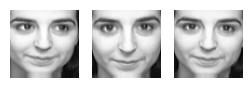

Faces in Cluster 45


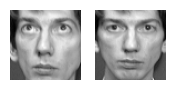

Faces in Cluster 46


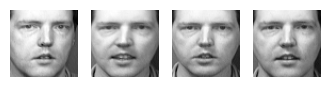

Faces in Cluster 47


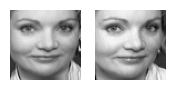

Faces in Cluster 48


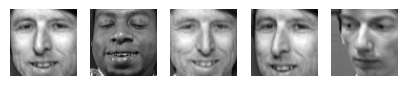

Faces in Cluster 49


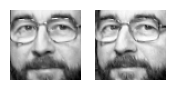

Faces in Cluster 50


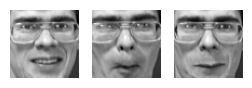

Faces in Cluster 51


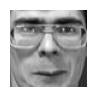

Faces in Cluster 52


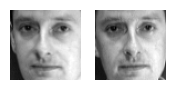

Faces in Cluster 53


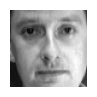

Faces in Cluster 54


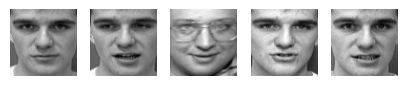

Faces in Cluster 55


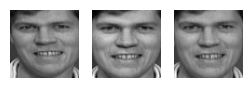

Faces in Cluster 56


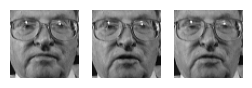

Faces in Cluster 57


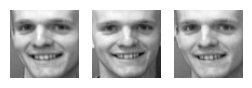

Faces in Cluster 58


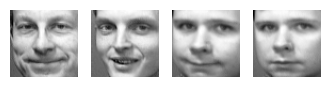

Faces in Cluster 59


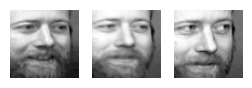

Faces in Cluster 60


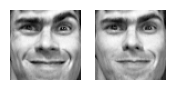

Faces in Cluster 61


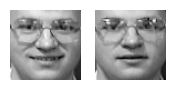

Faces in Cluster 62


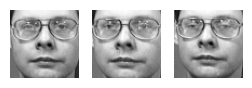

Faces in Cluster 63


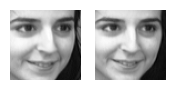

Faces in Cluster 64


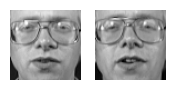

Faces in Cluster 65


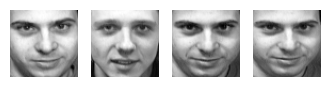

Faces in Cluster 66


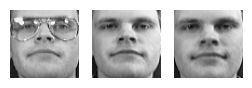

Faces in Cluster 67


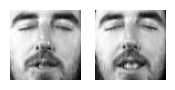

Faces in Cluster 68


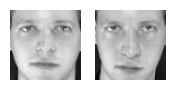

Faces in Cluster 69


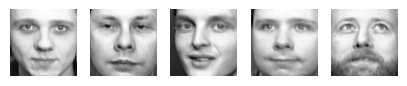

Faces in Cluster 70


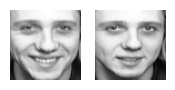

Faces in Cluster 71


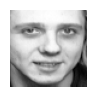

Faces in Cluster 72


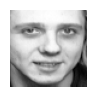

Faces in Cluster 73


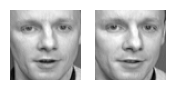

Faces in Cluster 74


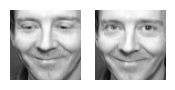

Faces in Cluster 75


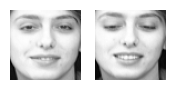

Faces in Cluster 76


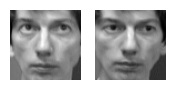

Faces in Cluster 77


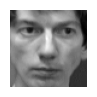

Faces in Cluster 78


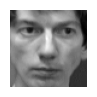

Faces in Cluster 79


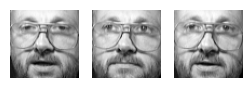

Faces in Cluster 80


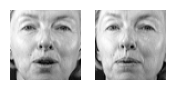

Faces in Cluster 81


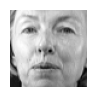

Faces in Cluster 82


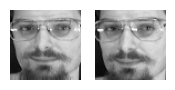

Faces in Cluster 83


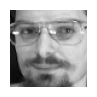

Faces in Cluster 84


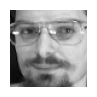

Faces in Cluster 85


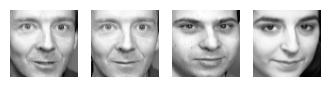

Faces in Cluster 86


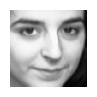

Faces in Cluster 87


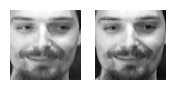

Faces in Cluster 88


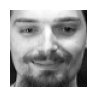

Faces in Cluster 89


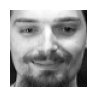

Faces in Cluster 90


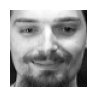

Faces in Cluster 91


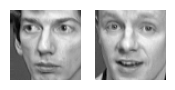

Faces in Cluster 92


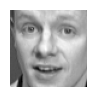

Faces in Cluster 93


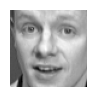

Faces in Cluster 94


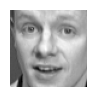

Faces in Cluster 95


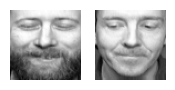

Faces in Cluster 96


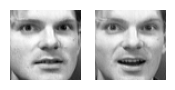

Faces in Cluster 97


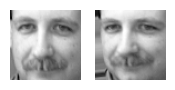

Faces in Cluster 98


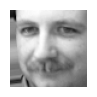

Faces in Cluster 99


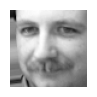

Faces in Cluster 100


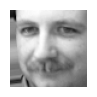

Faces in Cluster 101


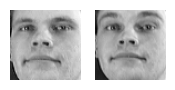

In [21]:
faces_df = pd.DataFrame(X_train)
faces_df["Cluster"] = kmeans.labels_

for cluster_idx in sorted(list(faces_df["Cluster"].unique())):
  print(f"Faces in Cluster {cluster_idx}")
  cluster_df = faces_df[faces_df["Cluster"] == cluster_idx]
  cluster_faces = cluster_df.drop(["Cluster"], axis=1).to_numpy().reshape((-1, 64, 64))
  fig, ax = plt.subplots(1, cluster_faces.shape[0], figsize=(1*cluster_faces.shape[0], 1))
  if cluster_faces.shape[0] == 1:
    ax.imshow(face, cmap="gray")
    ax.axis("off")
  else:
    for face_idx, face in enumerate(cluster_faces):
      ax[face_idx].imshow(face, cmap="gray")
      ax[face_idx].axis("off")
  plt.show()

In [22]:
cluster_faces.shape

(2, 64, 64)

# RandomForest

In [34]:
def evaluate_model(model, X, y):
  accuracy = accuracy_score(y_true=y, y_pred=model.predict(X)).round(4)
  f1 = f1_score(y_true=y, y_pred=model.predict(X), average="macro").round(4)
  print(f"Accuracy Score: {accuracy}")
  print(f"F1 Score: {f1}")
  print("-"*30)

In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Train Evaluation")
evaluate_model(model=rf, X=X_train, y=y_train)

print("Validation Evaluation")
evaluate_model(model=rf, X=X_val, y=y_val)

Train Evaluation
Accuracy Score: 1.0
F1 Score: 1.0
------------------------------
Validation Evaluation
Accuracy Score: 0.9375
F1 Score: 0.9283
------------------------------


# KMeans as Dimensionality Reduction Tool for RandomForests

In [37]:
rf_pipe = Pipeline(
  [
    ("pca", PCA(0.99)), 
    ("kmeans", KMeans(n_clusters = 102, random_state=42)), 
    ("rf", RandomForestClassifier(random_state=42))
  ]
)

rf_pipe.fit(X_train, y_train)

print("Train Evaluation")
evaluate_model(model=rf_pipe, X=X_train, y=y_train)

print("Validation Evaluation")
evaluate_model(model=rf_pipe, X=X_val, y=y_val)

Train Evaluation
Accuracy Score: 1.0
F1 Score: 1.0
------------------------------
Validation Evaluation
Accuracy Score: 0.7344
F1 Score: 0.6575
------------------------------


In [40]:
kmeans_pipe = Pipeline(
  [
    ("pca", PCA(0.99)), 
    ("kmeans", KMeans(n_clusters = 102, random_state=42))
  ]
)

X_train_reduced = kmeans_pipe.fit_transform(X_train)
X_val_reduced = kmeans_pipe.transform(X_val)
X_test_reduced = kmeans_pipe.transform(X_test)

X_train_appended = np.c_[
    X_train, X_train_reduced
]

X_val_appended = np.c_[
    X_val, X_val_reduced
]

X_test_appended = np.c_[
    X_test, X_test_reduced
]

In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_appended, y_train)

print("Train Evaluation")
evaluate_model(model=rf, X=X_train_appended, y=y_train)

print("Validation Evaluation")
evaluate_model(model=rf, X=X_val_appended, y=y_val)

Train Evaluation
Accuracy Score: 1.0
F1 Score: 1.0
------------------------------
Validation Evaluation
Accuracy Score: 0.9219
F1 Score: 0.906
------------------------------
